In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.decomposition import PCA

# Taiwan Credit Card Default Dataset

This dataset is given to aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default.

## Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [2]:
## Load xls data into pandas dataframe
raw_df=pd.read_excel("case_example/default_credit_dataset/default of credit card clients.xls",skiprows=1)
print raw_df.head()

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689  

In [3]:
## Extract features column
features_column=raw_df.drop(columns=['ID','default payment next month'])

print features_column.head()

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0     -2    ...           689          0          0          0         0   
1      0    ...          2682       3272       3455       3261         0   
2      0    ...         13559      14331      14948      15549      1518   
3      0    ...         49291      28314      28959      29547      2000   
4      0    ...         35835      20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       689         0         0       

In [4]:
## Extract label column
label_column=raw_df['default payment next month']

print label_column.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64


In [5]:
## Transform features dataframe into matrix
features_vectors=features_column.as_matrix()

print 'Total Features = %i'%(features_vectors.shape[1])
print 'Total Data = %i'%(features_vectors.shape[0])

## Normalize features vectors
normed_features_vectors = features_vectors.astype('float32') / features_vectors.astype('float32').max(axis=0)

print 'Original vectors'
print features_vectors[:5,:5] # SHowed only first 5 column and first 5 features

print 'Normalized vectors'
print normed_features_vectors[:5,:5]

Total Features = 23
Total Data = 30000
Original vectors
[[ 20000      2      2      1     24]
 [120000      2      2      2     26]
 [ 90000      2      2      2     34]
 [ 50000      2      2      1     37]
 [ 50000      1      2      1     57]]
Normalized vectors
[[ 0.02        1.          0.33333334  0.33333334  0.30379745]
 [ 0.12        1.          0.33333334  0.66666669  0.32911393]
 [ 0.09        1.          0.33333334  0.66666669  0.43037975]
 [ 0.05        1.          0.33333334  0.33333334  0.46835443]
 [ 0.05        0.5         0.33333334  0.33333334  0.72151899]]


In [6]:
## Transform label dataframe into matrix
label_vectors=label_column.as_matrix().astype('float32')

print 'Original label vector'
print label_vectors[:5]

Original label vector
[ 1.  1.  0.  0.  0.]


In [7]:
## Classification using SVM

## Split train and test data
X_train, X_test, y_train, y_test = train_test_split(normed_features_vectors, label_vectors, test_size=0.3, random_state=0)

print 'Train data size = %i'%(X_train.shape[0])
print 'Tes data size = %i'%(X_test.shape[0])

## Fitting the data into SVM model

clf = SVC(kernel='linear', C=5)
clf.fit(X_train, y_train) 

Train data size = 21000
Tes data size = 9000


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
## Prediction result using test data
y_pred = clf.predict(X_test)

print 'Prediction result :'
print y_pred

Prediction result :
[ 0.  0.  0. ...,  0.  0.  0.]


CSonfusion matrix
[[6883  177]
 [1488  452]]


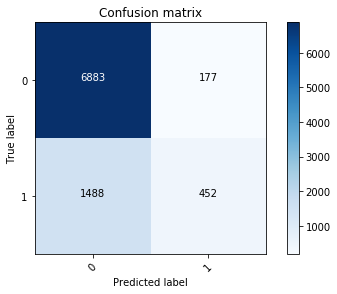

In [10]:
import matplotlib.pyplot as plt
## Visualizing prediction result using confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    print("CSonfusion matrix")
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix')
plt.show()

Looking from above visualization, we can know that there are many default payment data (label == 1) predicted as default payment (label == 0).
This may be caused by imbalance dataset. The distribution of label == 1 and label == 0 is not balanced that caused the model bias towards 0

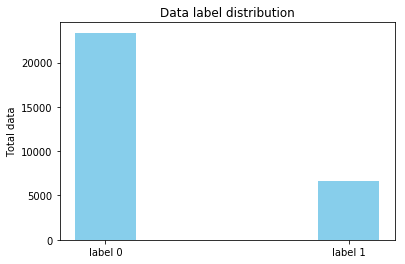

In [29]:
## Visualize each label data count
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ind = np.arange(2)  # the x locations for the groups
width = 0.5  # the width of the bars


total_0_data=len(np.argwhere(label_vectors==0))
total_1_data=len(np.argwhere(label_vectors==1))

total_data=np.array([total_0_data,total_1_data])

ax.bar(ind, total_data, width/2,color='SkyBlue')

ax.set_ylabel('Total data')
ax.set_title('Data label distribution')
ax.set_xticks(ind)
ax.set_xticklabels(('label '+str(i) for i in (0,1)))
ax.legend()

In [11]:
## Validating accuracy using cross validation method

scores = cross_val_score(clf, normed_features_vectors, label_vectors, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.80173276  0.80139953  0.80573142  0.80173276  0.80833333  0.81633333
  0.81693898  0.81027009  0.81527176  0.81493831]
Accuracy: 0.81 (+/- 0.01)


In [12]:
## Trying to reduce feature dimension using PCA from 23-dim to 10-dim
pca = PCA(n_components=10)
reduced_features_10=pca.fit_transform(normed_features_vectors)

print 'Matrix shape before feature dimensionality reduction :'
print normed_features_vectors.shape
print 'Matrix shape after feature dimensionality reduction :'
print reduced_features_10.shape

Matrix shape before feature dimensionality reduction :
(30000, 23)
Matrix shape after feature dimensionality reduction :
(30000, 10)


In [13]:
## Validating accuracy using cross validation method after feature dimensionality reduction

scores = cross_val_score(clf, reduced_features_10, label_vectors, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.80173276  0.80139953  0.80573142  0.8023992   0.80766667  0.81533333
  0.8186062   0.81060353  0.81493831  0.81493831]
Accuracy: 0.81 (+/- 0.01)


In [14]:
## Trying to reduce feature dimension using PCA from 23-dim to 5-dim
pca = PCA(n_components=5)
reduced_features_5=pca.fit_transform(normed_features_vectors)

print 'Matrix shape before feature dimensionality reduction :'
print normed_features_vectors.shape
print 'Matrix shape after feature dimensionality reduction :'
print reduced_features_5.shape

Matrix shape before feature dimensionality reduction :
(30000, 23)
Matrix shape after feature dimensionality reduction :
(30000, 5)


In [16]:
## Validating accuracy using cross validation method after feature dimensionality reduction

scores = cross_val_score(clf, reduced_features_5, label_vectors, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.77874042  0.77874042  0.77874042  0.77874042  0.77866667  0.77866667
  0.77892631  0.77892631  0.77892631  0.77892631]
Accuracy: 0.78 (+/- 0.00)
